Text(0, 0.5, 'Frequency')

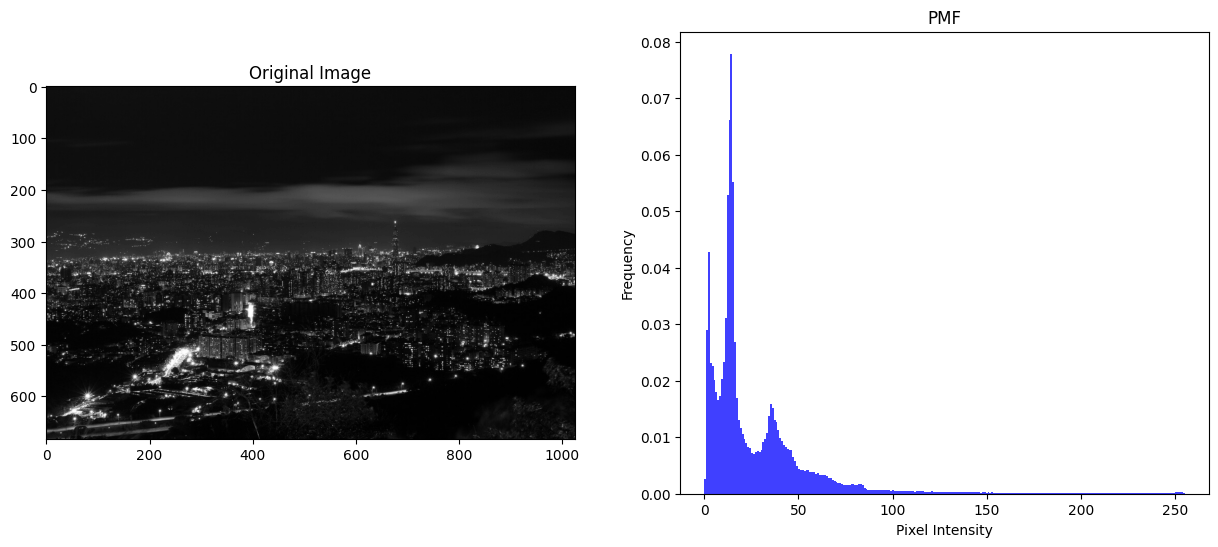

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 讀取圖像並轉為灰階
image = Image.open('814.jpg').convert('L')  # 將圖像轉為灰階
image_np = np.array(image)  # 轉為 NumPy 陣列格式

# 顯示原始影像
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
# PMF 直方圖
plt.subplot(1, 2, 2)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

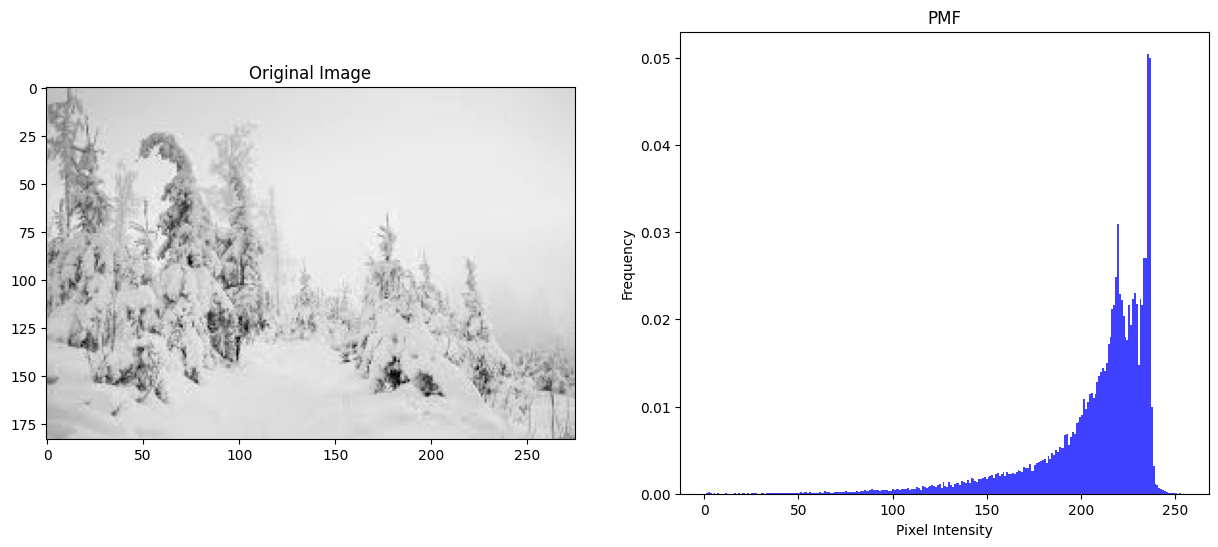

In [6]:
# 讀取圖像並轉為灰階
image = Image.open('images.jpeg').convert('L')  # 將圖像轉為灰階
image_np = np.array(image)  # 轉為 NumPy 陣列格式

# 顯示原始影像
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
# PMF 直方圖
plt.subplot(1, 2, 2)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

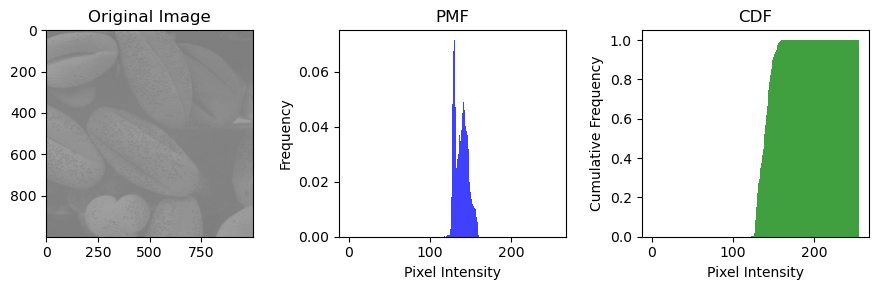

In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 讀取圖像並轉為灰階
image = Image.open('bin_gary.jpg').convert('L')  # 將圖像轉為灰階
image_np = np.array(image)  # 轉為 NumPy 陣列格式

# 顯示原始影像
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
# PMF 直方圖
plt.subplot(1, 3, 2)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# CDF 直方圖
plt.subplot(1, 3, 3)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), cumulative=True, density=True, color='green', alpha=0.75)
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()

In [118]:
# 計算直方圖和累積分布函數（CDF）
histogram, bins = np.histogram(image_np.flatten(), bins=256, range=[0, 256])
cdf = histogram.cumsum()  # 計算累積分布函數
cdf = cdf / cdf.max()  # 正規化 CDF 到 0~1 範圍

# 設定 r_max 和 r_min
r_max,r_min  = 255,0

# 根據公式 s_k = round(CDF(r_k) * (r_max - r_min))
equalized_image_np = np.round(cdf[image_np] * (r_max - r_min)).astype(np.uint8)
print(image_np)
print(cdf[image_np])
print(equalized_image_np)
# 儲存等化後的影像
equalized_image = Image.fromarray(equalized_image_np)  # 將 NumPy 陣列轉回 PIL 影像
equalized_image.save('equalized_image.jpg')  # 儲存為 .jpg 檔案

[[123 123 123 ... 126 124 123]
 [121 121 121 ... 122 120 119]
 [121 121 121 ... 121 119 118]
 ...
 [126 126 126 ... 145 143 141]
 [126 126 126 ... 145 143 141]
 [126 126 126 ... 145 143 141]]
[[2.11200e-03 2.11200e-03 2.11200e-03 ... 2.00310e-02 2.64200e-03
  2.11200e-03]
 [1.08700e-03 1.08700e-03 1.08700e-03 ... 1.66300e-03 5.78000e-04
  2.32000e-04]
 [1.08700e-03 1.08700e-03 1.08700e-03 ... 1.08700e-03 2.32000e-04
  1.64000e-04]
 ...
 [2.00310e-02 2.00310e-02 2.00310e-02 ... 7.85828e-01 7.07316e-01
  6.17919e-01]
 [2.00310e-02 2.00310e-02 2.00310e-02 ... 7.85828e-01 7.07316e-01
  6.17919e-01]
 [2.00310e-02 2.00310e-02 2.00310e-02 ... 7.85828e-01 7.07316e-01
  6.17919e-01]]
[[  1   1   1 ...   5   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  5   5   5 ... 200 180 158]
 [  5   5   5 ... 200 180 158]
 [  5   5   5 ... 200 180 158]]


In [120]:
np.round(cdf[123] * (r_max - r_min)).astype(np.uint8)

1

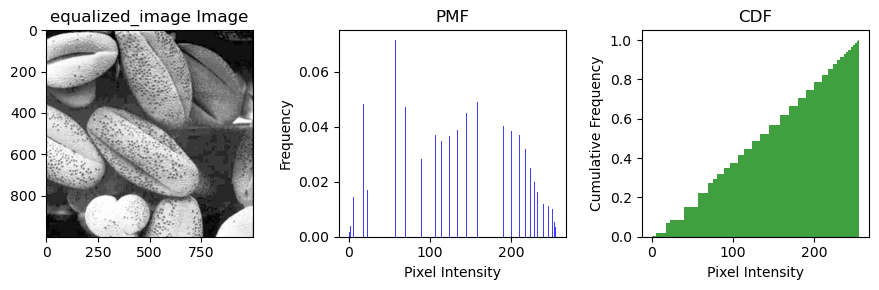

In [102]:
# 顯示原始影像與等化後的影像
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(equalized_image_np, cmap='gray', vmin=0, vmax=255)
plt.title('equalized_image Image')
# PMF 直方圖
plt.subplot(1, 3, 2)
plt.hist(equalized_image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# CDF 直方圖
plt.subplot(1, 3, 3)
plt.hist(equalized_image_np.flatten(), bins=256, range=(0, 255), cumulative=True, density=True, color='green', alpha=0.75)
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()


